In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
222,37,144000,1
114,42,80000,0
135,23,63000,0
93,29,28000,0
185,31,66000,0


<h3>train test split</h3>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df.drop('Purchased',axis=1),
                                                  df['Purchased'],
                                                  test_size=0.3,
                                                  random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

 <h3>standard Scaler</h3>

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [15]:
#now we need to transform and use scale train and test data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train_scaled
#it is in array we need to convert so we will create dataframe from this array

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [18]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [19]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [21]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


<h2>
    after scaling effect
    
</h2>

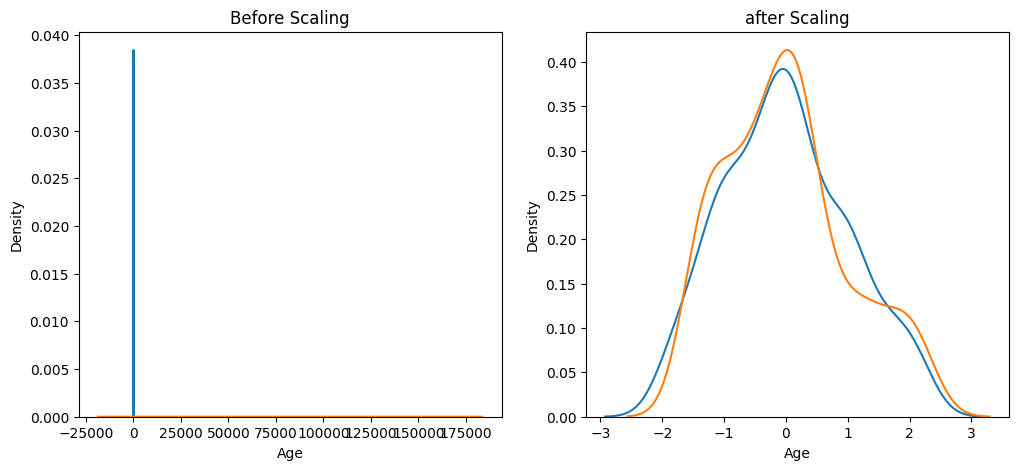

In [25]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('after Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

hum yaha dekh sakte h pahle age ka graph kaise upar ja raha h uska pdf kyuki salary jyada range me h aur age kam to wo peak kar gya but after scaling we got perfect

<Axes: xlabel='Age', ylabel='Density'>

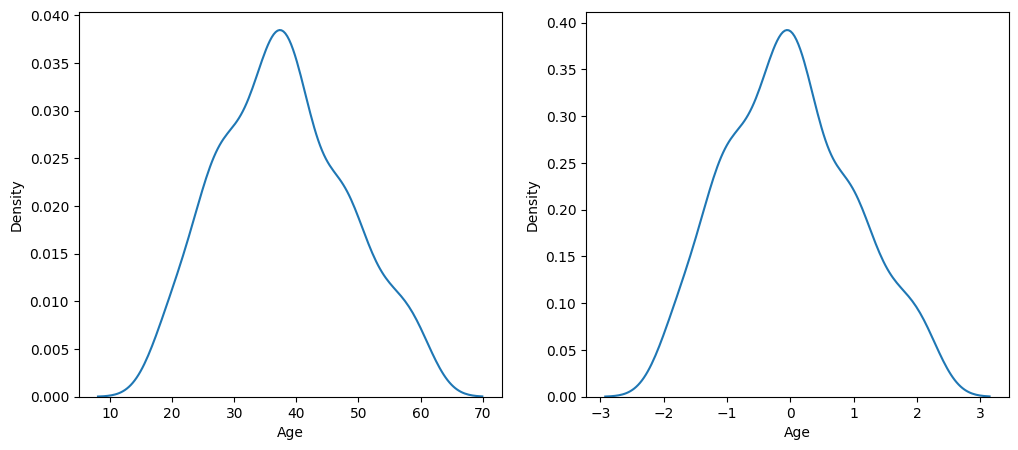

In [26]:
#distribution same rhta h data same bss scale chane hota h for example
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Age'],ax=ax1)

sns.kdeplot(X_train_scaled['Age'],ax=ax2)